# Validation 1GnB - DEJMPS purification policy

In [4]:
import numpy as np
import math
import importlib as imp
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm as tqdmn

import main_1GnB as main

---
---
## Availability

In [118]:
n = 2

# GEN
p_gen = 1
F_new = 0.9
rho_new = np.diag([F_new, (1-F_new)/3, (1-F_new)/3, (1-F_new)/3])

# PURIF
q_purif = 1
purif_policy = main.policy_identity
pur_after_swap = False

# NOISE
Gamma = 1/5

# CONS
p_cons = 0.1

# Numerical
t_end = 100
randomseed = 2

In [119]:
imp.reload(main)

A = main.availability(n, p_gen, rho_new, q_purif, purif_policy, pur_after_swap, Gamma, p_cons)
(Fcons_avg, Fcons_stderr, A_avg, A_stderr,
 buffered_fidelity_trace, cons_requests_trace, purif_events) = main.single_run_1GnB(n, p_gen, rho_new, q_purif, 
                                                               purif_policy, pur_after_swap, Gamma,
                                                               p_cons, t_end, randomseed)

print('Availability (analytical): %.3f'%A)
print('Availability (simulation): %.3f (%.3f)'%(A_avg, A_stderr))

Availability (analytical): 0.029
Availability (simulation): nan (nan)


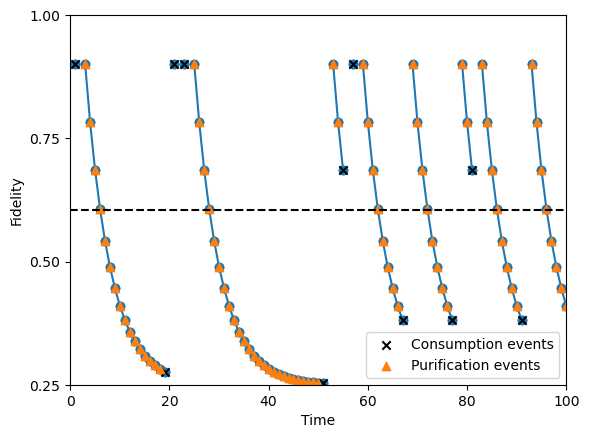

In [117]:
imp.reload(main)

main.plot_run_1GnB(Fcons_avg, buffered_fidelity_trace, cons_requests_trace, purif_events, n, p_gen, rho_new,
                    q_purif, purif_policy, pur_after_swap, Gamma, p_cons, t_end, randomseed)

---
### CONCLUSIONS:
 1. When $q=1$ and the purification policy is the identity ($a_l=1$, $b_l=0$, $c_l=0$, $d_l=1$), no purification is applied. In that case, when $p_\mathrm{gen}=p_\mathrm{cons}=1$, we should have $A=0.5$, since half of the time we have a link that can be consumed and half of the steps are used to regenerate that link. The simulation gives $A=0.5$ but the analytics does not.
 2. In this same situation, when $p_\mathrm{cons}\rightarrow0$, we should get $A\rightarrow1$ (intuitively) -- the simulation confirms the intuition but the analytics seem to go to zero.
---